In [34]:
# Importing the required python libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Loading the data from the csv file into a pandas dataframe

df = pd.read_csv("data/1000_Companies.csv")

In [3]:
# Viewing the first 5 rows of data

df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# Displaying the shape and the size of the dataset

print(df.shape)
print(df.size)
print(len(df))

(1000, 5)
5000
1000


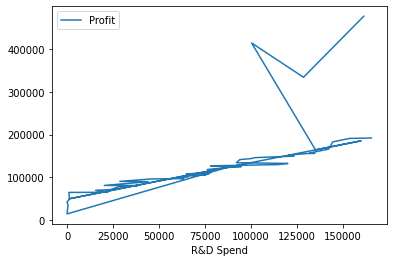

In [5]:
# Visualising the relationship between the input variable "R&D Spend" and the output variable "Profit" as a line plot

line_plot = df.plot.line(x='R&D Spend', y='Profit')

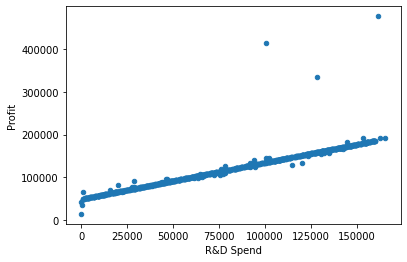

In [17]:
# Visualising the relationship between the input variable "R&D Spend" and the output variable "Profit" as a scatter plot

scatter_plot = df.plot.scatter(x='R&D Spend', y='Profit')

In [6]:
# Calculating the mean of the input variable "R&D Spend"

mean_rd_spend = sum(df['R&D Spend'])/float(len(df['R&D Spend']))
print("The mean of the input variable 'R&D Spend': ", mean_rd_spend)

The mean of the input variable 'R&D Spend':  81668.9272


In [7]:
# Calculating the mean of the output variable "Profit"

mean_profit = sum(df['Profit'])/float(len(df['Profit']))
print("The mean of the output variable 'Profit': ", mean_profit)

The mean of the output variable 'Profit':  119546.1646556102


In [8]:
# Defining a function to calculate the variance of the input variable "R&D Spend"

def variance(values, mean):
    return sum([value-mean**2 for value in values])

In [9]:
# Defining a function to calculate the co-variance between the input variable and the output variable

def co_variance(rd_spend, mean_rd_spend, profit, mean_profit):
    covariance = 0.0
    for i in range(len(df['Profit'])):
        covariance = covariance + ((rd_spend[i]-mean_rd_spend) * (profit[i]-mean_profit))
    return covariance
    

In [10]:
# Calculating the variance of the input variable "R&D Spend"

variance_rd_spend = variance(df['R&D Spend'], mean_rd_spend)
print("The variance of the input variable 'R&D Spend': ", variance_rd_spend)

The variance of the input variable 'R&D Spend':  -6669732001071.763


In [11]:
# Calculating the variance of the output variable "Profit"

variance_profit = variance(df['Profit'], mean_profit)
print("The variance of the output variable 'Profit': ", variance_profit)

The variance of the output variable 'Profit':  -14291165937701.623


In [12]:
# Calculating the co-variance between the input variable and the output variable

covariance_rdspend_profit = co_variance(df['R&D Spend'], mean_rd_spend, df['Profit'], mean_profit)
print("the co-variance between the input variable 'R&D Spend' and the output variable 'Profit': ", covariance_rdspend_profit)

the co-variance between the input variable 'R&D Spend' and the output variable 'Profit':  1884759344610.1313


In [13]:
# Linear Equation "Y = mx + c"

In [14]:
# Calculating the slope "m" of the input variable "x" i.e.; ""R&D Spend"

m = covariance_rdspend_profit/variance_rd_spend
print("The slope 'm' value of the input variable 'R&D Spend': ", m)

The slope 'm' value of the input variable 'R&D Spend':  -0.2825839695368972


In [15]:
# Calculating the intercept "c" of the linear equation

c = mean_profit - (m * mean_rd_spend)
print("The intercept 'c' value of the linear equation:", c)

The intercept 'c' value of the linear equation: 142624.49429160607


In [ ]:
# Linear Equation "Y = -0.28x + 142624.49"

In [20]:
# Calculating the predicted values of the output variable "Profit" using the co-efficients 'm' and 'c'

profit_predicted = []
for i in range(len(df['R&D Spend'])):
    Y_pred = (-0.28 * df['R&D Spend'][i]) + 142624.49
    profit_predicted.append(Y_pred)

#print(len(profit_predicted))
#print(profit_predicted) 

In [22]:
# Adding a new column named "Profit_Predicted" to the dataframe

df["Profit_Predicted"] = profit_predicted
df

,R&D Spend,Administration,Marketing Spend,State,Profit,Profit_Predicted
0,165349.20,136897.800,471784.1000,New York,192261.83000,96326.7140
1,162597.70,151377.590,443898.5300,California,191792.06000,97097.1340
2,153441.51,101145.550,407934.5400,Florida,191050.39000,99660.8672
3,144372.41,118671.850,383199.6200,New York,182901.99000,102200.2152
4,142107.34,91391.770,366168.4200,Florida,166187.94000,102834.4348
...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251,127466.6900
996,134970.00,130390.080,329204.0228,California,164336.60550,104832.8900
997,100275.47,241926.310,227142.8200,California,413956.48000,114547.3584
998,128456.23,321652.140,281692.3200,California,333962.19000,106656.7456


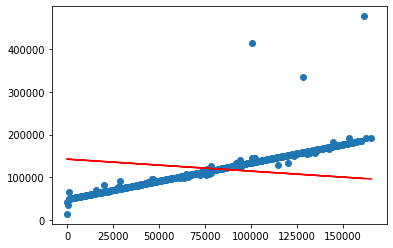

In [33]:
# Visualising the data and the linear regression line

plt.scatter(x=df['R&D Spend'], y=df['Profit'])
plt.plot(df['R&D Spend'], df['Profit_Predicted'], color='red')

In [37]:
# Sample profit prediction for a given value of "R&D Spend"

# R&D Spend Value
x = 185000.00

# Profit prediction calculation as per the best fit linear equation for the regression model
profit = (-0.28 * 185000) + 142624.49
print("The predicted profit for a 'R&D Spend' of about 185000.00 is {}".format(profit))

The predicted profit for a 'R&D Spend' of about 185000.00 is 90824.48999999999
